<a href="https://colab.research.google.com/github/CFathurrohman/Machine_learning/blob/main/Week9/ML_W9_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biodata
Nama  : Cyndu Fathur Rohman

Kelas : TI-3G

# Tugas
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

## 1. Import Library
Pada langkah ini, kita mengimpor library yang diperlukan untuk membangun model neural network dan melakukan analisis.

- TensorFlow: Digunakan untuk membuat dan melatih model neural network.
- Sequential: Dari tensorflow.keras.models, digunakan untuk membangun model ANN secara berurutan.
- Dense dan Flatten: Dari tensorflow.keras.layers, digunakan untuk mendefinisikan lapisan-lapisan dalam ANN. Dense adalah lapisan yang sepenuhnya terhubung, dan Flatten mengubah input dari bentuk matriks menjadi vektor.
- to_categorical: Dari tensorflow.keras.utils, digunakan untuk mengubah label ke dalam bentuk one-hot encoding.
- confusion_matrix: Dari sklearn.metrics, digunakan untuk menghitung confusion matrix yang akan membantu kita menilai kinerja model.
- classification_report: Dari sklearn.metrics, digunakan untuk mendapatkan pemahaman yang lebih baik tentang kinerja model.
- matplotlib.pyplot dan seaborn: Digunakan untuk visualisasi, terutama untuk menggambarkan confusion matrix.
- NumPy: Digunakan untuk operasi array dan manipulasi data.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 2. Memuat Dataset
Kita akan memuat dataset MNIST, yang sudah disediakan dalam TensorFlow. Dataset ini terdiri dari citra angka tulisan tangan (0-9) yang berukuran 28x28 pixel, serta label yang sesuai untuk setiap citra.

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Melihat tipe data dan bentuk dari dataset
print("Tipe data x_train:", type(x_train))
print("Bentuk x_train:", x_train.shape)
print("Tipe data y_train:", type(y_train))
print("Bentuk y_train:", y_train.shape)

print("Tipe data x_test:", type(x_test))
print("Bentuk x_test:", x_test.shape)
print("Tipe data y_test:", type(y_test))
print("Bentuk y_test:", y_test.shape)


Tipe data x_train: <class 'numpy.ndarray'>
Bentuk x_train: (60000, 28, 28)
Tipe data y_train: <class 'numpy.ndarray'>
Bentuk y_train: (60000,)
Tipe data x_test: <class 'numpy.ndarray'>
Bentuk x_test: (10000, 28, 28)
Tipe data y_test: <class 'numpy.ndarray'>
Bentuk y_test: (10000,)


Setelah memuat dataset MNIST, penting untuk memeriksa tipe data dari `x_train` dan `y_train`. Mengetahui tipe data sangat penting karena:

- Kesesuaian Data: Memastikan bahwa data berada dalam format yang tepat untuk proses selanjutnya. Misalnya, jika gambar berada dalam format integer, kita mungkin perlu mengonversinya menjadi float untuk normalisasi.
- Operasi yang Tepat: Tipe data yang berbeda memengaruhi cara kita melakukan operasi pada data. Mengetahui tipe data membantu kita menentukan fungsi dan metode yang tepat yang dapat digunakan untuk pra-pengolahan.
- Desain Model: Tipe data juga memengaruhi pemilihan model dan parameter yang tepat. Sebagai contoh, jika label berupa integer untuk klasifikasi, kita harus menggunakan fungsi loss yang sesuai.
- Pencegahan Kesalahan: Memeriksa tipe data terlebih dahulu dapat membantu mengidentifikasi potensi masalah yang bisa muncul saat pelatihan model, seperti kesalahan tipe data yang tidak cocok.

## 3. Pra-pengolahan dan Pemilihan Fitur
Sebelum kita melatih model, kita perlu melakukan beberapa pra-pengolahan data. Kita akan melakukan normalisasi dan mengubah dimensi data.

- Normalisasi: Kita membagi nilai pixel (0-255) dengan 255 sehingga nilai pixel menjadi antara 0 dan 1. Ini membantu model untuk belajar lebih cepat dan lebih baik.
- Reshape Data: Kita mengubah bentuk data citra dari 28x28 menjadi vektor 1D berukuran 784 untuk setiap citra.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0  # Mengubah ke bentuk (60000, 784) dan normalisasi
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0    # Mengubah ke bentuk (10000, 784) dan normalisasi

Normalisasi membantu mengurangi skala variabel dan membuat proses pembelajaran lebih stabil. Mereshape citra menjadi vektor 1D memungkinkan kita untuk memasukkan data ke dalam model ANN yang hanya menerima input vektor.


``` python
x_train = x_train.reshape(-1, 28 * 28)
```

- x_train.shape: Ini memberikan informasi tentang dimensi data pelatihan x_train. Untuk dataset MNIST, output dari x_train.shape biasanya akan terlihat seperti (60000, 28, 28), di mana:

  - 60000: Jumlah citra dalam dataset pelatihan.
  - 28: Tinggi citra dalam pixel.
  - 28: Lebar citra dalam pixel.

- y_train.shape: Ini memberikan bentuk dari label untuk data pelatihan. Biasanya, outputnya akan seperti (60000,), yang menunjukkan bahwa ada 60.000 label yang sesuai untuk data pelatihan.

- x_test.shape: Untuk data pengujian, output biasanya akan terlihat seperti (10000, 28, 28), yang berarti ada 10.000 citra dalam dataset pengujian.

``` python
.astype('float32') / 255.0
```
- Setelah mengubah bentuk gambar, kita juga ingin mengubah jenis data menjadi float32. Ini adalah cara komputer menyimpan angka desimal.
- Gambar asli biasanya memiliki nilai dari 0 sampai 255 (angka gelap sampai terang). Untuk membantu komputer belajar dengan lebih baik, kita membagi semua nilai tersebut dengan 255.0. Ini akan mengubah nilai-nilai tersebut menjadi antara 0.0 (hitam) dan 1.0 (putih).
- Dengan cara ini, model kita dapat belajar dengan lebih baik karena semua data berada dalam rentang yang sama.

## 4. Membuat dan Mengkomplikasi Model ANN
Pada langkah ini, kita mendefinisikan arsitektur model ANN. Model ini akan memiliki beberapa lapisan sebagai berikut:

- Input Layer: 784 neuron (untuk mengubah citra berukuran 28x28 pixel menjadi vektor 1D).

- Hidden Layers:
  - Lapisan Pertama: 128 neuron dengan fungsi aktivasi ReLU, yang memungkinkan model belajar representasi yang lebih kompleks dari data.
  -Lapisan Kedua: 64 neuron dengan fungsi aktivasi ReLU, yang juga membantu model dalam mengekstraksi fitur dari data.
- Output Layer: 10 neuron (satu untuk setiap digit dari 0 hingga 9) dengan fungsi aktivasi softmax, yang mengeluarkan distribusi probabilitas untuk setiap kelas digit.

Setelah model dibuat, kita perlu mengompilasinya. Kita akan menggunakan optimasi Adam dan fungsi loss sparse_categorical_crossentropy. Untuk mempercepat pelatihan, kita akan mengurangi jumlah epoch.

In [ ]:
# Membuat ANN model
model = Sequential([
    Flatten(input_shape=(28*28,)),  # Mengubah input citra 28x28 menjadi vektor 1D
    Dense(128, activation='relu'),    # Lapisan tersembunyi pertama dengan 128 neuron dan fungsi aktivasi ReLU
    Dense(64, activation='relu'),     # Lapisan tersembunyi kedua dengan 64 neuron dan fungsi aktivasi ReLU
    Dense(10, activation='softmax')   # Lapisan output dengan 10 neuron (untuk 10 kelas) dan fungsi aktivasi softmax
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Kompilasi model mengkonfigurasi model untuk pelatihan. Kita memilih optimizer Adam karena efisien dalam hal kecepatan dan kinerja. Fungsi loss sparse categorical crossentropy cocok untuk tugas klasifikasi dengan label integer.

## 5. Pelatihan Model
Setelah model dikompilasi, kita melatih model dengan data pelatihan. Kita akan mengatur jumlah epoch menjadi 10 agar pelatihan tidak memakan waktu lama dan bisa lebih akurat.

In [ ]:
# Melatih model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8681 - loss: 0.4596 - val_accuracy: 0.9550 - val_loss: 0.1560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9652 - loss: 0.1159 - val_accuracy: 0.9692 - val_loss: 0.1097
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9764 - loss: 0.0775 - val_accuracy: 0.9682 - val_loss: 0.1052
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9821 - loss: 0.0544 - val_accuracy: 0.9719 - val_loss: 0.0923
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9770 - val_loss: 0.0854
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9721 - val_loss: 0.0955
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9709 - val_loss: 0.1059
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0192

## 6. Prediksi dan Evaluasi Menggunakan Confusion Matrix
Setelah model dilatih, langkah selanjutnya adalah melakukan prediksi pada data uji (x_test). Dengan menggunakan model yang sudah dilatih, kita dapat memprediksi label untuk gambar-gambar yang belum pernah dilihat sebelumnya.

Setelah melakukan prediksi, kita menghitung confusion matrix untuk mengevaluasi kinerja model. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Ini terdiri dari:

- True Positives (TP): Jumlah kasus di mana model memprediksi kelas dengan benar.
- True Negatives (TN): Jumlah kasus di mana model memprediksi kelas yang salah, tetapi sebenarnya adalah negatif.
- False Positives (FP): Jumlah kasus di mana model memprediksi kelas positif tetapi sebenarnya adalah negatif.
- False Negatives (FN): Jumlah kasus di mana model memprediksi kelas negatif tetapi sebenarnya adalah positif.

Dengan informasi ini, kita dapat menghitung metrik evaluasi lainnya, seperti akurasi, precision, recall, dan F1-score. Confusion matrix memberikan wawasan yang lebih dalam tentang bagaimana model berperforma di setiap kelas, membantu kita mengidentifikasi kelas mana yang sulit diprediksi dan area yang mungkin perlu ditingkatkan. Dengan demikian, evaluasi menggunakan confusion matrix adalah langkah penting dalam memahami efektivitas model kita dalam menyelesaikan tugas klasifikasi.

313/313 - 1s - 2ms/step - accuracy: 0.9762 - loss: 0.0961
Test accuracy: 0.9762
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


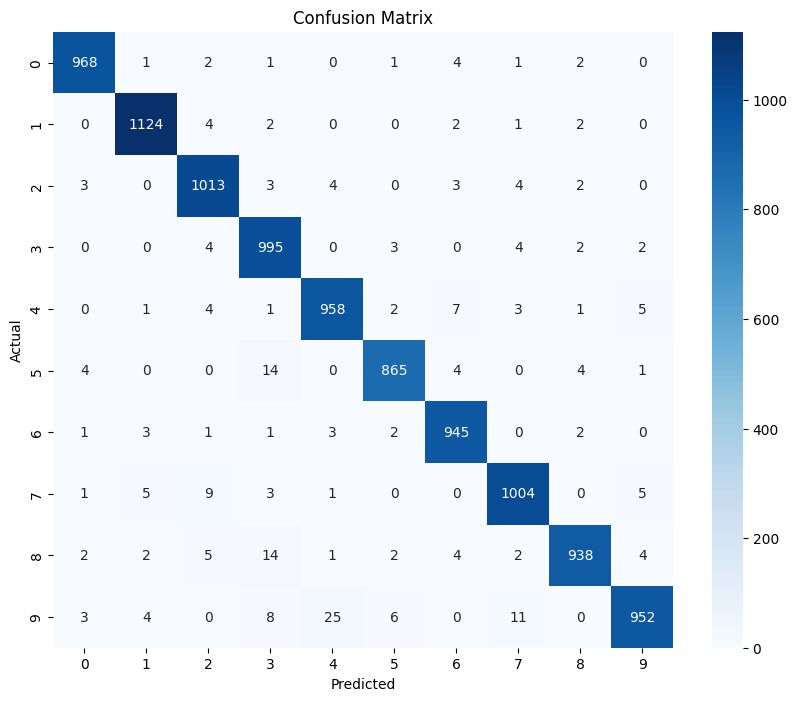

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Prediksi dan membuat confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung prediksi
y_pred = np.argmax(model.predict(x_test), axis=1)

# Menampilkan Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

**Hasil yang diperoleh**

**Akurasi**

Model Artificial Neural Network (ANN) yang dibangun untuk mengklasifikasikan dataset MNIST menunjukkan hasil yang sangat baik. Model mencapai training accuracy sebesar 98% dan test accuracy sebesar 97.62%.

**Confusion matrix**

Confusion matrix memberikan gambaran yang jelas tentang kinerja model dalam memprediksi kelas digit. Matriks ini menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Dengan nilai precision dan recall yang tinggi di setiap kelas, model menunjukkan kemampuan yang baik dalam mengenali digit tangan, di mana kesalahan yang terjadi sebagian besar merupakan kebingungan antara kelas yang mirip. Confusion matrix dapat digunakan untuk menganalisis area mana yang perlu diperbaiki dalam model.

**Konfigurasi Model**

Pra-Pengolahan Data: Dataset MNIST dimuat dan diperiksa untuk memastikan kesesuaian format. Data dinormalisasi agar berada dalam rentang [0, 1] dengan membagi nilai piksel dengan 255. Kemudian, data diubah menjadi bentuk yang dapat diproses oleh model.

Membangun Model ANN: Model ANN terdiri dari beberapa lapisan:

  - Input Layer: Menggunakan lapisan Flatten untuk mengubah input citra berukuran 28x28 piksel menjadi vektor 1D berukuran 784 (28*28).
  - Hidden Layers: Terdiri dari dua lapisan Dense, yang pertama memiliki 128 neuron dengan fungsi aktivasi ReLU, dan yang kedua memiliki 64 neuron dengan fungsi aktivasi ReLU.
  - Output Layer: Terdiri dari 10 neuron (satu untuk setiap digit 0-9) dengan fungsi aktivasi softmax, yang memberikan probabilitas prediksi untuk setiap kelas.

**Kesimpulan**

Hasil ini menunjukkan bahwa model tidak hanya berhasil belajar dari data pelatihan tetapi juga mampu menggeneralisasi dengan baik terhadap data uji yang belum pernah dilihat sebelumnya. Dengan nilai precision, recall, dan f1-score yang tinggi di setiap kelas, serta confusion matrix yang menunjukkan performa yang konsisten, model ANN ini membuktikan efektivitasnya dalam tugas klasifikasi citra digit tangan.